In [528]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import skimage
import numpy as np
import scipy.signal
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [529]:
img = plt.imread('cat_small.jpg', 'jpg')
gray_img = rgb2gray(img)

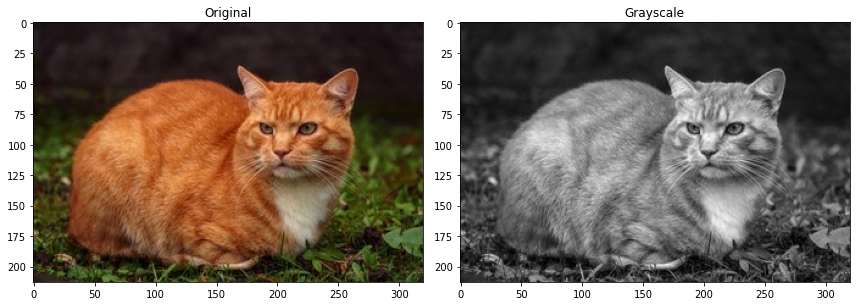

In [530]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [566]:
noise = skimage.util.random_noise(gray_img, mode='gaussian', mean=0, var=0.02)

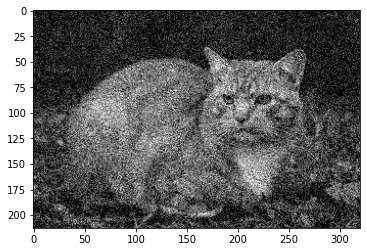

In [567]:
plt.imshow(noise, cmap=plt.cm.gray)
plt.show()

In [558]:
order = 5
cutoff = .8

In [559]:
f1 = np.array(np.arange(-order + 1, order + 1, 2) / order)
f2 = np.array(np.arange(-order + 1, order + 1, 2) / order)

x, y = np.meshgrid(f1, f2)

In [560]:
Hd = np.zeros((order, order))
d = np.where(np.sqrt(x * x + y * y) < cutoff)
Hd[d] = 1

Hd

array([[0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0.]])

In [544]:
# H = scipy.signal.sepfir2d(Hd, f1, f2)

In [431]:
# Hd = np.zeros((7, 7), dtype=np.float64)
# Hd[2:5, 2:5] = np.ones((3, 3), np.float64)

In [120]:
# f1 = [-0.8571, -0.5714, -0.2857, 0, 0.2857, 0.5714, 0.8571]
# f2 = [-0.8571, -0.5714, -0.2857, 0, 0.2857, 0.5714, 0.8571]

# x, y = np.meshgrid(f1, f2)

# H = scipy.signal.sepfir2d(Hd, f1, f2)

In [121]:
# H = np.array([
#         [0, 0, 0, -0.0039, 0, 0, 0],
#         [0, 0.0008, 0.0065, 0.0105, 0.0065, 0.0008, 0],
#         [0, 0.0065, 0.0597, 0.1059, 0.0597, 0.0065, 0],
#         [-0.0039, 0.0105, 0.1059, 0.1837, 0.1059, 0.0105, -0.0039],
#         [0, 0.0065, 0.0597, 0.1059, 0.0597, 0.0065, 0],
#         [0, 0.0008, 0.0065, 0.0105, 0.0065, 0.0008, 0],
#         [0, 0, 0, -0.0039, 0, 0, 0]
# ])

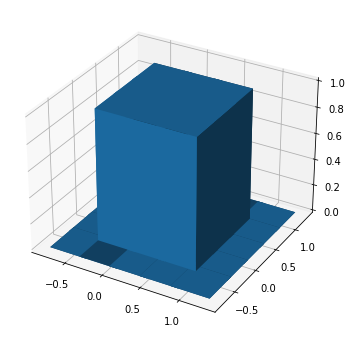

In [594]:
fig = plt.figure(figsize=(6, 6))          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x.flatten(), y.flatten(), np.zeros(25), 0.5, 0.5, Hd.flatten(), zsort='average')

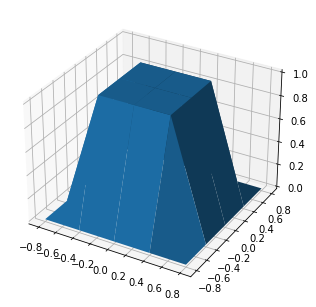

In [561]:
fig = pylab.figure()
axes = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(axes)

axes.plot_surface(x, y, Hd)
pylab.show()

In [569]:
filter_img = scipy.signal.convolve2d(noise, Hd)

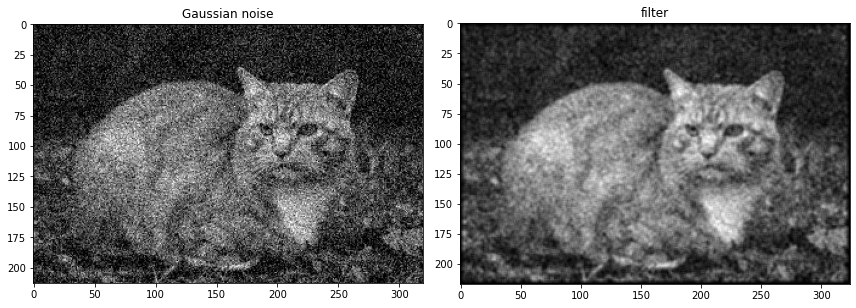

In [570]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(noise, cmap=plt.cm.gray)
ax[0].set_title("Gaussian noise")
ax[1].imshow(filter_img, cmap=plt.cm.gray)
ax[1].set_title("filter")

fig.tight_layout()
plt.show()
plt.show()

In [571]:
noise = skimage.util.random_noise(gray_img, mode='s&p')
filter_img = scipy.signal.convolve2d(noise, Hd)

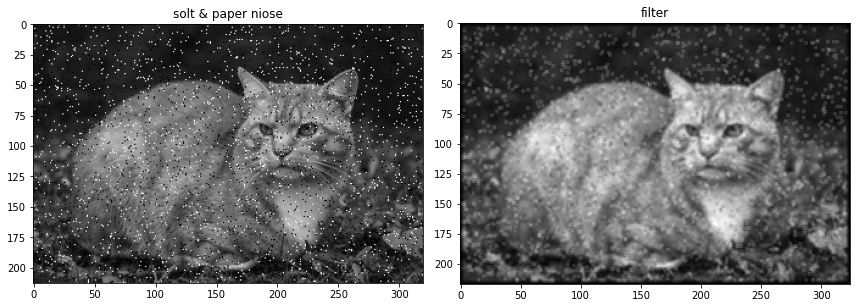

In [572]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(noise, cmap=plt.cm.gray)
ax[0].set_title("solt & paper niose")
ax[1].imshow(filter_img, cmap=plt.cm.gray)
ax[1].set_title("filter")

fig.tight_layout()
plt.show()

In [573]:
filter_img = scipy.signal.medfilt2d(gray_img)

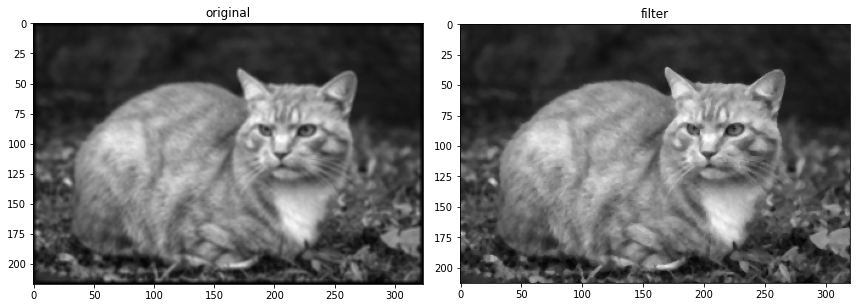

In [574]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(scipy.signal.convolve2d(gray_img, Hd), cmap=plt.cm.gray)
ax[0].set_title("original")
ax[1].imshow(filter_img, cmap=plt.cm.gray)
ax[1].set_title("filter")

fig.tight_layout()
plt.show()